# Coding 

- Top coding
- Bottom coding 
- Zero coding 

## Outliers


An outlier is an observation that lies outside the overall pattern of a distribution __[Moore and McCabe, 1999]__.

- Outliers can either be treated special completely ignored 

- E.g., Fraudulant transactions are outliers, but since we want to avoid them, they must be paid special attention 

- If we think that the outliers are errors, we should remove them 

- Data statistics are very susceptible to outliers

- Some models are very sensitive to outliers


### Properties

- Extremely high or extremely low values
- Sometimes due to data entry errors
- Sometimes NA flags introduced by Data Scientists  

## Processing

- Mean/median imputation 
- Random sampling
- Discretization 
- Trimming/Discarding 
- Winzorization 


### Mean/median imputation

- If outliers are due to human or mechanical error 

- If their nature is similar to missing data 

### Random sampling

- If outliers are due to human or mechanical error 

- If their nature is similar to missing data 

### Discretization

- Transformation of continuous variables into discrete variables

- Make defined groups 

- E.g., turning age to age groups 

### Trimming

- Removal of the outliers 

- Observations containing outliers are removed 

- Reduces dataset size 


## Winzorization

- Transformation of data statistics by limiting extreme vaues to reduce their effect

**Top-coding**

- Capping the maximum of a distribution at an arbitrarily value

- Data points are censored above an upper bound censored

**Bottom-coding**

- Capping the minimum of a distribution at an arbitrarily value

- Data points are censored below a lower bound  censored

**Zero-coding**

- Values below zero are capped 

- Can not have negative values 


## Titanic dataset

In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [258]:
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv("gdrive/My Drive/Colab Notebooks/FeatureEngineering/train_date.csv")
data = data[['Fare', 'Age', 'Survived']]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [259]:
data.head()

,Fare,Age,Survived
0,7.2500,22.0,0
1,71.2833,38.0,1
2,7.9250,26.0,1
3,53.1000,35.0,1
4,8.0500,35.0,0


In [260]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['Fare', 'Age']].fillna(data[['Fare', 'Age']].mean()), data.Survived,
                                                    test_size=0.2)
X_train.shape, X_test.shape

((712, 2), (179, 2))

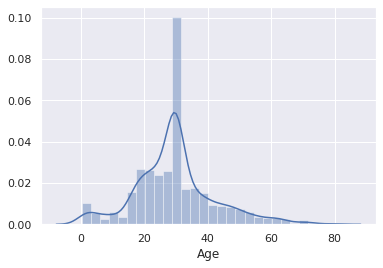

In [261]:
sns.set()
sns.distplot(X_train['Age'])

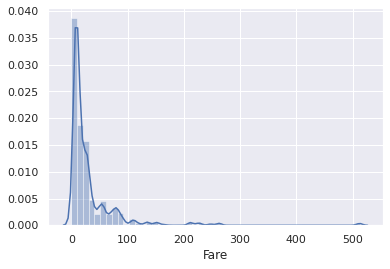

In [262]:
sns.set()
sns.distplot(X_train['Fare'])

Age shows a gaussian distribution so we can use the mean and standard deviations for outlier detection. For fare, we will use the IQR method

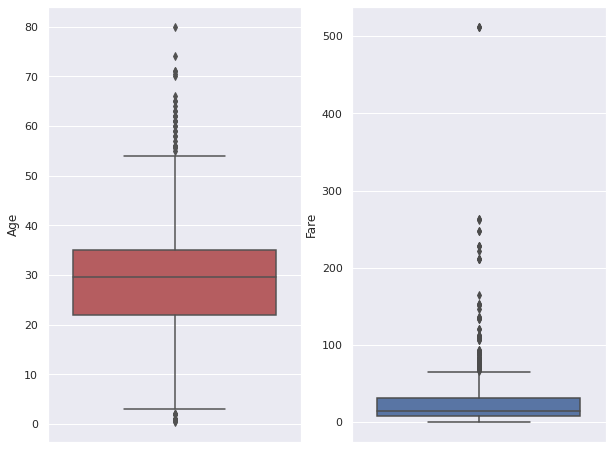

In [263]:
fig, ax = plt.subplots(1,2, figsize = (10,8))
sns.boxplot(y='Age', data = X_train, ax=ax[0], color = 'r')
sns.boxplot(y='Fare', data=X_train, ax=ax[1], color = 'b')

In [264]:
X_train['Fare'].describe()

count    712.000000
mean      31.798934
std       50.357486
min        0.000000
25%        7.895800
50%       13.860400
75%       30.771850
max      512.329200
Name: Fare, dtype: float64

In [265]:
X_train['Age'].describe()

count    712.000000
mean      29.545383
std       12.623182
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [266]:
IQR = data['Fare'].quantile(0.75) - data['Fare'].quantile(0.25)
ub = data['Fare'].quantile(0.75) + (IQR * 3)
lb = data['Fare'].quantile(0.25) - (IQR * 3)
data[(data['Fare']>ub) | (data['Fare']<lb)].groupby('Survived')['Fare'].count()

Survived
0    14
1    39
Name: Fare, dtype: int64

In [267]:
# Get outliers
IQR = data['Age'].quantile(0.75) - data['Age'].quantile(0.25)
ub = data['Age'].mean() + data['Age'].std()
lb = data['Age'].mean() - data['Age'].std()
data[(data['Age']>ub) | (data['Age']<lb)].groupby('Survived')['Age'].count()

Survived
0    106
1     92
Name: Age, dtype: int64

The upper boundary, above which every value is considered an outlier is a cost of 100 dollars for the Fare.

In [268]:
def get_gaussian_bounds(data, column):
  ub = data[column].mean() + data[column].std()
  lb = data[column].mean() - data[column].std()
  return lb, ub

In [269]:
def get_bounds(data, column):
  IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
  ub = data[column].quantile(0.75) + (IQR * 3)
  lb = data[column].quantile(0.25) - (IQR * 3)
  return lb, ub

In [270]:
X_train.Fare.max(), X_test.Fare.max()

(512.3292, 263.0)

In [271]:
lb, ub = get_bounds(X_train, 'Fare')
X_train.loc[X_train.Fare>ub, 'Fare'] = ub
X_test.loc[X_test.Fare>lb, 'Fare'] = lb
X_train.Fare.max(), X_test.Fare.max()

(99.4, -60.732350000000004)

In [272]:
X_train.Age.max(), X_test.Age.max()

(80.0, 70.0)

In [273]:
lb, ub = get_gaussian_bounds(X_train, 'Age')
X_train.loc[X_train['Age']>ub, 'Age'] = ub
X_test.loc[X_test['Age']>lb, 'Age'] = lb
X_train.Age.max(), X_test.Age.max()

(42.16856441351059, 16.922200622840933)

In [274]:
from sklearn.model_selection import train_test_split
X_train_ref, X_test_ref, y_train_ref, y_test_ref = train_test_split(data[['Fare', 'Age']].fillna(data[['Fare', 'Age']].mean()), data.Survived,
                                                    test_size=0.2)
X_train_ref.shape, X_test_ref.shape

((712, 2), (179, 2))

In [275]:
from sklearn.preprocessing import StandardScaler
obj = StandardScaler()
X_train = obj.fit_transform(X_train)
X_test = obj.transform(X_test)

X_train_red = obj.fit_transform(X_train_ref)
X_test_ref = obj.transform(X_test_ref)

In [276]:
from sklearn.metrics import accuracy_score

In [277]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_ref,y_train_ref)
y_pred_ref = classifier.predict(X_test_ref)
y_pred_ref = np.round(y_pred_ref).flatten()
print(accuracy_score(y_test_ref, y_pred_ref))


0.5754189944134078
0.6312849162011173


In [278]:
from sklearn.linear_model import RidgeClassifierCV
classifier = RidgeClassifierCV()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_ref,y_train_ref)
y_pred_ref = classifier.predict(X_test_ref)
y_pred_ref = np.round(y_pred_ref).flatten()
print(accuracy_score(y_test_ref, y_pred_ref))

0.5754189944134078
0.6312849162011173


In [279]:
from sklearn.linear_model import RidgeClassifierCV
classifier = RidgeClassifierCV()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_ref,y_train_ref)
y_pred_ref = classifier.predict(X_test_ref)
y_pred_ref = np.round(y_pred_ref).flatten()
print(accuracy_score(y_test_ref, y_pred_ref))

0.5754189944134078
0.6312849162011173


In [280]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_ref,y_train_ref)
y_pred_ref = classifier.predict(X_test_ref)
y_pred_ref = np.round(y_pred_ref).flatten()
print(accuracy_score(y_test_ref, y_pred_ref))

0.6145251396648045
0.6312849162011173


In [281]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_ref,y_train_ref)
y_pred_ref = classifier.predict(X_test_ref)
y_pred_ref = np.round(y_pred_ref).flatten()
print(accuracy_score(y_test_ref, y_pred_ref))

0.5754189944134078
0.43575418994413406


In [282]:
from sklearn.svm import LinearSVC
classifier = LinearSVC()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_ref,y_train_ref)
y_pred_ref = classifier.predict(X_test_ref)
y_pred_ref = np.round(y_pred_ref).flatten()
print(accuracy_score(y_test_ref, y_pred_ref))

0.5754189944134078
0.6312849162011173


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [283]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_ref,y_train_ref)
y_pred_ref = classifier.predict(X_test_ref)
y_pred_ref = np.round(y_pred_ref).flatten()
print(accuracy_score(y_test_ref, y_pred_ref))

0.6089385474860335
0.39106145251396646


In [284]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_ref,y_train_ref)
y_pred_ref = classifier.predict(X_test_ref)
y_pred_ref = np.round(y_pred_ref).flatten()
print(accuracy_score(y_test_ref, y_pred_ref))

0.6089385474860335
0.3687150837988827


In [285]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_ref,y_train_ref)
y_pred_ref = classifier.predict(X_test_ref)
y_pred_ref = np.round(y_pred_ref).flatten()
print(accuracy_score(y_test_ref, y_pred_ref))

0.6089385474860335
0.39106145251396646


In [286]:
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_ref,y_train_ref)
y_pred_ref = classifier.predict(X_test_ref)
y_pred_ref = np.round(y_pred_ref).flatten()
print(accuracy_score(y_test_ref, y_pred_ref))

0.5754189944134078
0.6312849162011173


In [287]:
from sklearn.linear_model import Perceptron
classifier = Perceptron()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_ref,y_train_ref)
y_pred_ref = classifier.predict(X_test_ref)
y_pred_ref = np.round(y_pred_ref).flatten()
print(accuracy_score(y_test_ref, y_pred_ref))

0.4245810055865922
0.6145251396648045


In [288]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_ref,y_train_ref)
y_pred_ref = classifier.predict(X_test_ref)
y_pred_ref = np.round(y_pred_ref).flatten()
print(accuracy_score(y_test_ref, y_pred_ref))

0.4245810055865922
0.6312849162011173


In [289]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_ref,y_train_ref)
y_pred_ref = classifier.predict(X_test_ref)
y_pred_ref = np.round(y_pred_ref).flatten()
print(accuracy_score(y_test_ref, y_pred_ref))

0.6089385474860335
0.3687150837988827
